In [1]:
import scanpy as sc
import torch
from deepmap import DeepMap
import warnings

In [2]:
torch.cuda.set_device(1)

In [3]:
warnings.filterwarnings('ignore')

In [4]:
adata = sc.read_h5ad('../datasets/TM_Bladder.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 3878 × 23341
    obs: 'celltype', 'batch'

In [6]:
adata.obs

,celltype,batch
A12.D041914.3_8_M.1.1,bladder cell,SS2
B16.D041914.3_8_M.1.1,bladder urothelial cell,SS2
C18.D041914.3_8_M.1.1,bladder urothelial cell,SS2
D22.D041914.3_8_M.1.1,bladder urothelial cell,SS2
F4.D041914.3_8_M.1.1,bladder cell,SS2
...,...,...
10X_P7_7_TTGTAGGTCATGTAGC,bladder urothelial cell,10X
10X_P7_7_TTTACTGGTGTTGAGG,bladder cell,10X
10X_P7_7_TTTCCTCCATACCATG,bladder cell,10X
10X_P7_7_TTTGTCAGTTACCGAT,bladder urothelial cell,10X


In [7]:
batch_key = 'batch'

model = DeepMap(k = 10, mnn_only = False)
model.preprocess(adata, batch_key, gene_num = 4000)
model.integrate(n_iters = 2000, beta = 0.1)

Fri Jun  2 16:37:31 2023 Data normalization ...
Fri Jun  2 16:37:31 2023 Finding highly variable genes ...
Fri Jun  2 16:37:33 2023 Found 1793 highly variable genes
Fri Jun  2 16:37:33 2023 Saving unscaled data ...
Fri Jun  2 16:37:34 2023 Data Scaling ...
Fri Jun  2 16:37:34 2023 Performing PCA ...
Fri Jun  2 16:37:34 2023 Start integrating ...
Fri Jun  2 16:37:34 2023 GPU used.
Fri Jun  2 16:37:34 2023 Finding neighbors ...
Fri Jun  2 16:37:34 2023 Initial neighbor search completed, time used: 0.2 second.
Fri Jun  2 16:38:07 2023 Reconstructing neighbors 1/5 ...
Fri Jun  2 16:38:13 2023 Reconstructing neighbors 2/5 ...
Fri Jun  2 16:38:19 2023 Reconstructing neighbors 3/5 ...
Fri Jun  2 16:38:25 2023 Reconstructing neighbors 4/5 ...
Fri Jun  2 16:38:31 2023 Reconstructing neighbors 5/5 ...
Fri Jun  2 16:38:37 2023 Integration finished.


In [8]:
model.integrated

View of AnnData object with n_obs × n_vars = 3878 × 20
    obs: 'celltype', 'batch'

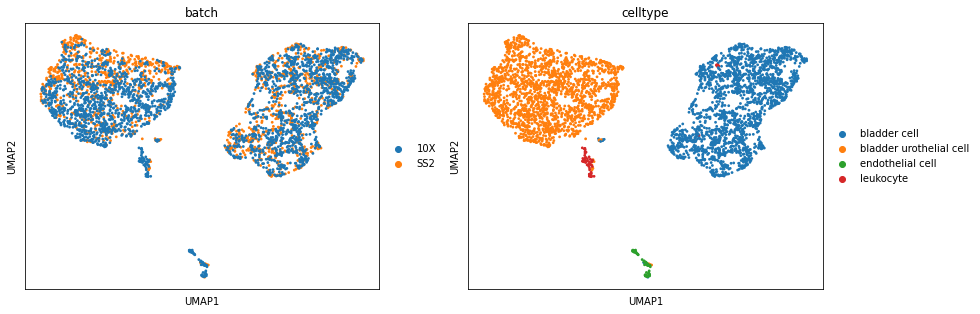

In [9]:
sc.pp.neighbors(model.integrated)
sc.tl.umap(model.integrated)
sc.pl.umap(model.integrated, color = ['batch', 'celltype'])